In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Loading the dataset 

In [2]:
mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalization of the input
x_train, x_test = x_train/255.0, x_test/255.0

# Try a simple Stack of dense layer

In [3]:
#definition of the model
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28,1)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

#setting the learning parameters
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
#trainin of the model
model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7501 - accuracy: 0.7570 - val_loss: 0.5680 - val_accuracy: 0.8062
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5157 - accuracy: 0.8251 - val_loss: 0.5053 - val_accuracy: 0.8249
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4711 - accuracy: 0.8365 - val_loss: 0.4914 - val_accuracy: 0.8273
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4454 - accuracy: 0.8457 - val_loss: 0.4727 - val_accuracy: 0.8337
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4273 - accuracy: 0.8515 - val_loss: 0.4570 - val_accuracy: 0.8420
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4136 - accuracy: 0.8565 - val_loss: 0.4423 - val_accuracy: 0.8442
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4018 - accuracy: 0.8603 - val_loss: 0.4472 - val_accuracy:

In [5]:
#see the loss of the test set properly
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3318 - accuracy: 0.8848


[0.3317960500717163, 0.8848000168800354]

# Introduce callback

This is use to control the behavior in the training step. 
We can define a condition to stop the training at some point of store the model

In [6]:
class StopCallback(keras.callbacks.Callback):
    def __init__(self, threshold=0.4):
        self.threshold = threshold
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < self.threshold):
            print("Threshold is met")
            self.model.stop_training = True

# Add callaback to the model


In [7]:
#definition of the model
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28,1)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

#setting the learning parameters
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
#train the model with the callback included
model.fit(x_train, y_train, callbacks=[StopCallback(0.5)], epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7496 - accuracy: 0.7537
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5183 - accuracy: 0.8236
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4712 - accuracy: 0.8382
Threshold is met


# Improved version of the model

Add convolution and pooling layers <br>
The goal of the convolution layers is to extract the usefull features in the image <br>
The pooling will reduce the shape of and assure that only the most relavent feature <br>
are send forward

In [9]:
#definition of the model
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

#setting the learning parameters
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
#we need to assure that the image are (28,28,1)
#so we need to add the last axis to form the channel
x_train, x_test = x_train[:,:,:, np.newaxis], x_test[:,:,:,np.newaxis]

In [11]:
#train the model with the callback included
#Now we set the threshold to 0.2
model.fit(x_train, y_train,callbacks=[StopCallback(0.2)], epochs=50)

Epoch 1/50
1875/1875 [==============================] - 77s 41ms/step - loss: 0.9115 - accuracy: 0.6676
Epoch 2/50
1875/1875 [==============================] - 60s 32ms/step - loss: 0.5420 - accuracy: 0.7986
Epoch 3/50
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4659 - accuracy: 0.8303
Epoch 4/50
1875/1875 [==============================] - 61s 33ms/step - loss: 0.4212 - accuracy: 0.8472
Epoch 5/50
1875/1875 [==============================] - 61s 32ms/step - loss: 0.3911 - accuracy: 0.8576
Epoch 6/50
1875/1875 [==============================] - 57s 31ms/step - loss: 0.3690 - accuracy: 0.8658
Epoch 7/50
1875/1875 [==============================] - 61s 32ms/step - loss: 0.3499 - accuracy: 0.8725
Epoch 8/50
1875/1875 [==============================] - 65s 35ms/step - loss: 0.3325 - accuracy: 0.8801
Epoch 9/50
1875/1875 [==============================] - 59s 31ms/step - loss: 0.3201 - accuracy: 0.8830
Epoch 10/50
1875/1875 [==============================] - 60s 32m

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.2743 - accuracy: 0.9044


[0.27425047755241394, 0.9043999910354614]

# Interpretation

Now let understand what the first layer is doing

In [13]:
#we get the first layers
layer1 = model.layers[0]
#now we get the weights and the biais of the layer1
weights = np.array(layer1.get_weights()[0])
biais = np.array(layer1.get_weights()[1])

print(f"Shape of the weights: {weights.shape} \nShape of the biais: {biais.shape}" )

Shape of the weights: (3, 3, 1, 64) 
Shape of the biais: (64,)


In [14]:
#Then we can see the filters contains in the first layer
filter_index = 0
print(weights[:,:,:,filter_index])

[[[-0.12000124]
  [-0.16910699]
  [ 0.26478112]]

 [[-0.01358608]
  [-0.3262945 ]
  [ 0.32978815]]

 [[ 0.01857108]
  [-0.20396413]
  [ 0.17971155]]]


Now let's see what this first filter of the first layer is doing

In [15]:
#we take the 1000 first image in the train set
subset = x_train[:1000]
#we pass it through the first layer
output_first_layer = layer1(subset)
#we extract the output of the first filter on the image
output_first_filter = output_first_layer[:,:,:,0]

#we want to plot the images that have the highest activation and
#try to identify to common feature in these image
#then we can deduce what the first filter does
average_activation = np.average(output_first_filter, axis=(1,2))
sorted_indexes = np.argsort(average_activation)


#select the 9 image with higest activation
selected_indexes = sorted_indexes[:9]
selected_images = subset[selected_indexes]

selected_activations = np.array(output_first_filter)[selected_indexes]

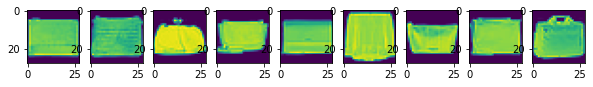

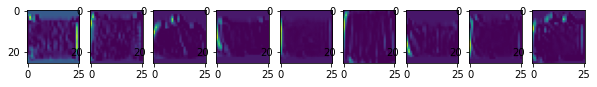

In [16]:
plt.rcParams["figure.figsize"] = (10,10)
f1, axarr1 = plt.subplots(1,9)
f2, axarr2 = plt.subplots(1,9)

for i in range(9):
    axarr1[i].imshow(selected_images[i,:,:,0])
    axarr2[i].imshow(selected_activations[i])
    axarr1[i].grid(False)
    axarr2[i].grid(False)

We can see that the first layer of the first layer put emphasis on the vertical lines(not exactly)<br>
If we test some other filter we can see what they really doing\nsometimes it is hard to describe it<br>
But with that we can have a sense of what convolution net work<br>
<br>
We have many filter that extract different features and we combine these features to extract complex features<br>
And with the complex feature we can use dense layer to predict the type of the image